<a href="#Import"> 1. Import Dependencies </a><br>
<a href="#Validate"> 2. Validate Data </a><br>
<a href="#ML"> 3. Machine Learning </a>

<hr>

## 1. Import Dependencies <a id='Import'></a>

In [52]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

from mongoHandler import mongoHandler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import shap


In [53]:
#mongoHandler = mongoHandler()
#mongoHandler.pullMongoDB("pastdata.csv")

## 2. Validate Data <a id=Validate></a>

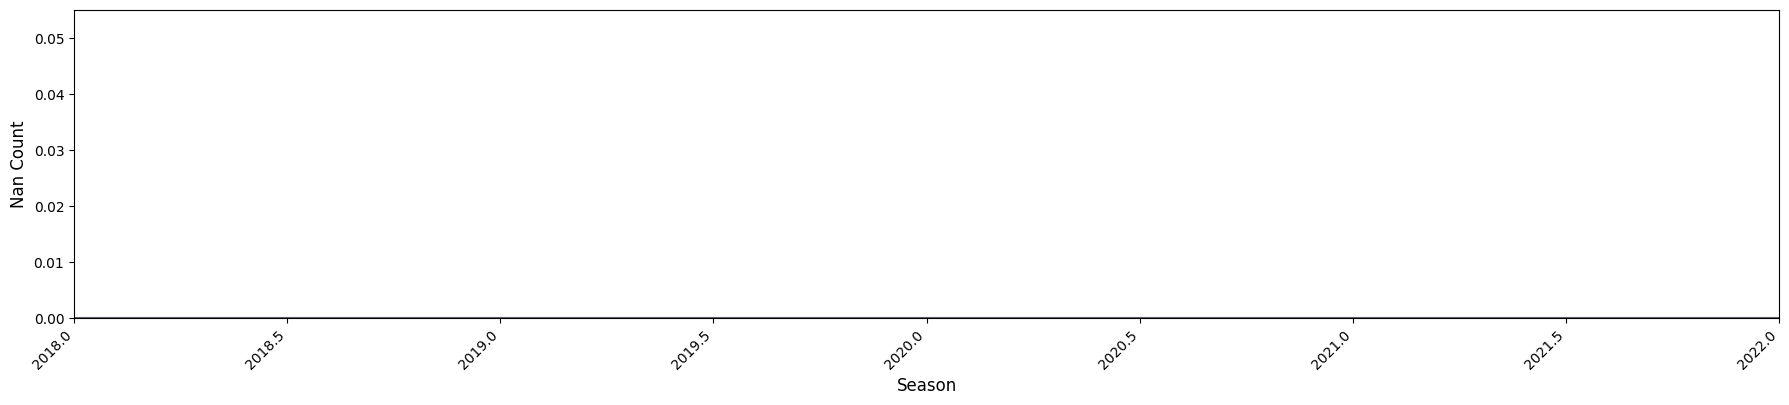

In [54]:
# This is optional as our data does not have any null values, but may be useful for other data sets
df = pd.read_csv("pastdata.csv")
df_detail_nan = []

for season in df['season'].unique():
    df_nan = df[df['season'] == season]
    series_nan = df_nan.isnull().sum()
    df_nan = series_nan.to_frame(name="Nan_Count")
    df_nan = df_nan.rename_axis('Col_Name').reset_index()
    df_nan['season'] = season
    df_detail_nan.append(df_nan)

df_detail_nan = pd.concat(df_detail_nan, ignore_index=True)

df_per_season_nan = df_detail_nan[['season','Nan_Count']].groupby("season").sum().reset_index()
df_per_season_nan = df_per_season_nan.sort_values(by=['season'], ascending=True)

fig = plt.figure(figsize = (22, 4))
sns.lineplot(data=df_per_season_nan, x="season", y="Nan_Count", sort=True)
plt.ylim(0)
plt.ylabel('Nan Count', fontsize=12)
plt.xticks(rotation=45,horizontalalignment='right',fontweight='light', fontsize=10)
plt.xlabel('Season', fontsize=12)
plt.margins(x=0)
plt.show()

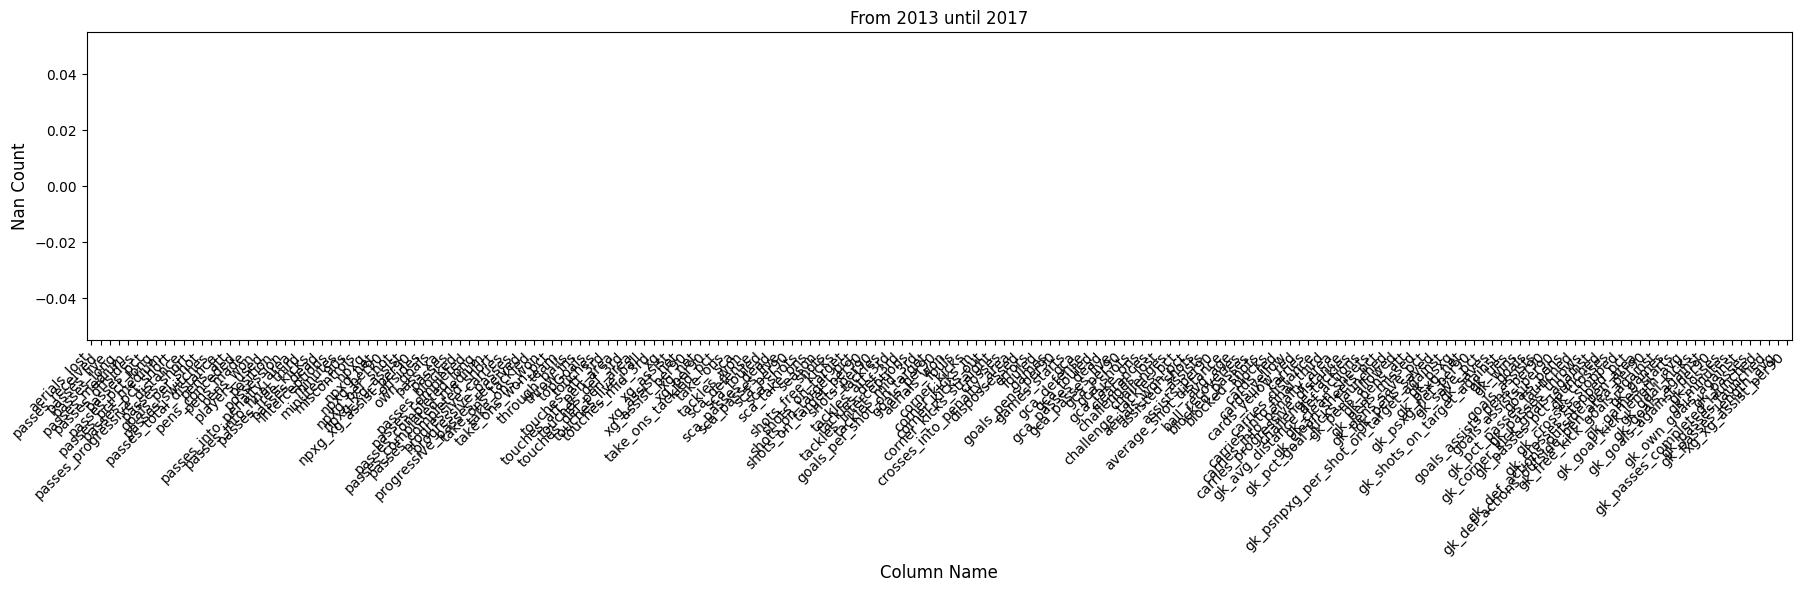

In [55]:

df = pd.read_csv("pastdata.csv")
df_detail_nan = []

for season in df['season'].unique():
    df_nan = df[df['season'] == season]
    series_nan = df_nan.isnull().sum()
    df_nan = series_nan.to_frame(name="Nan_Count")
    df_nan = df_nan.rename_axis('Col_Name').reset_index()
    df_nan['season'] = season
    df_detail_nan.append(df_nan)

df_detail_nan = pd.concat(df_detail_nan, ignore_index=True)

df_per_season_nan = df_detail_nan[['Col_Name','Nan_Count']].groupby("Col_Name").sum().reset_index()
df_per_season_nan = df_per_season_nan.sort_values(by=['Nan_Count'], ascending=False)

# Filter the DataFrame to only include attributes with no null values
df_per_season_nan = df_per_season_nan[df_per_season_nan['Nan_Count'] <= 200]

fig = plt.figure(figsize = (22, 4))
sns.barplot(data=df_per_season_nan, x="Col_Name", y="Nan_Count")
plt.ylabel('Nan Count', fontsize=12)
plt.xticks(rotation=45,horizontalalignment='right',fontweight='light', fontsize=10)
plt.xlabel('Column Name', fontsize=12)
plt.title(f"From 2013 until 2017", fontsize=12)
plt.show()

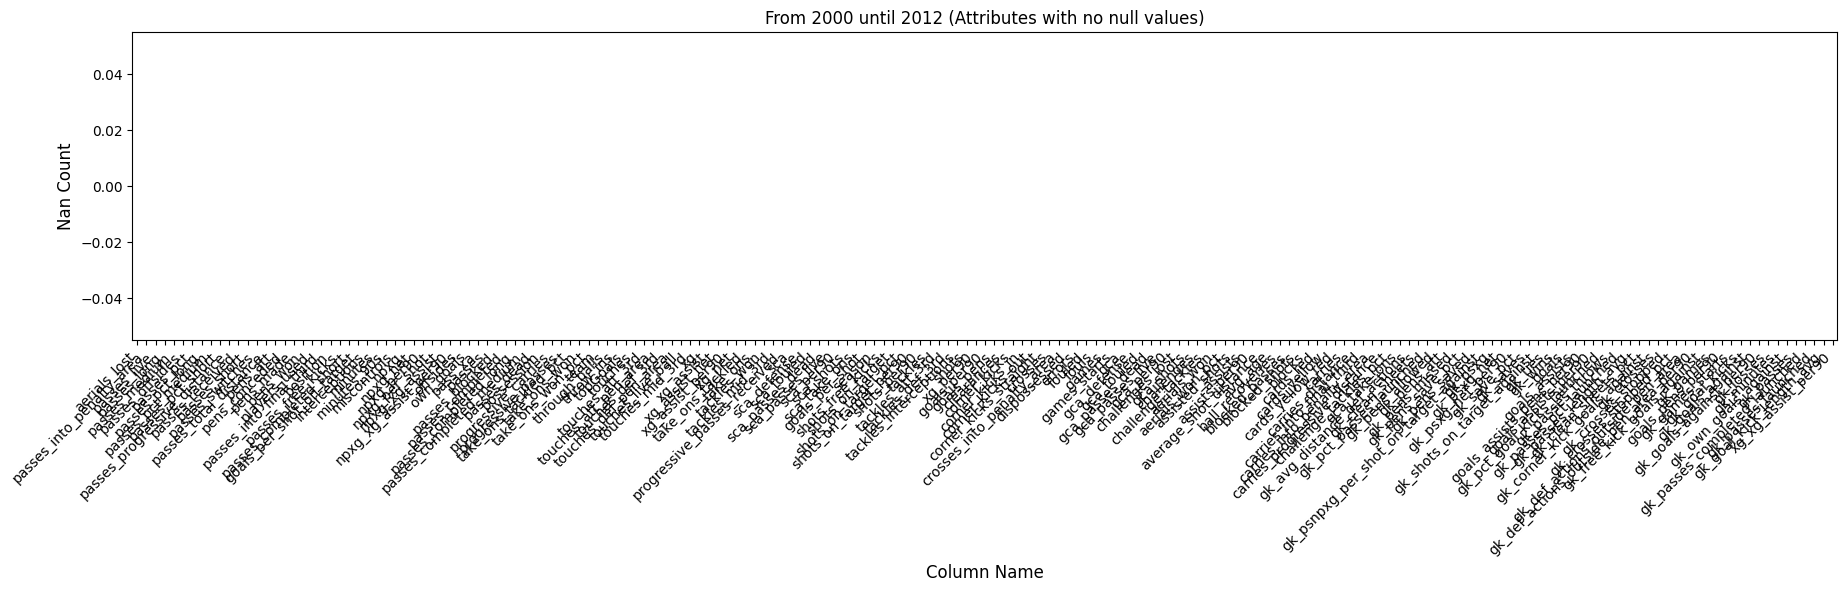

In [56]:
df = pd.read_csv("pastdata.csv")
df_detail_nan = []

for season in df['season'].unique():
    df_nan = df[df['season'] == season]
    series_nan = df_nan.isnull().sum()
    df_nan = series_nan.to_frame(name="Nan_Count")
    df_nan = df_nan.rename_axis('Col_Name').reset_index()
    df_nan['season'] = season
    df_detail_nan.append(df_nan)

df_detail_nan = pd.concat(df_detail_nan, ignore_index=True)

df_per_season_nan = df_detail_nan[['Col_Name','Nan_Count']].groupby("Col_Name").sum().reset_index()
df_per_season_nan = df_per_season_nan.sort_values(by=['Nan_Count'], ascending=True)

# Filter the DataFrame to only include attributes with no null values
df_per_season_nan = df_per_season_nan[df_per_season_nan['Nan_Count'] <= 200]

fig = plt.figure(figsize = (22, 4))
sns.barplot(data=df_per_season_nan, x="Col_Name", y="Nan_Count")
plt.ylabel('Nan Count', fontsize=12)
plt.xticks(rotation=45,horizontalalignment='right',fontweight='light', fontsize=10)
plt.xlabel('Column Name', fontsize=12)
plt.title(f"From 2000 until 2012 (Attributes with no null values)", fontsize=12)
plt.show()

## 3. Machine Learning <a id="ML"></a>

In [57]:
target = df['position']
features = df.drop(['position','team'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
model = RandomForestClassifier()
#model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Test Prediction: {', '.join(map(str, y_pred))}")

Test Prediction: 17, 5, 5, 3, 9, 17, 17, 17, 9, 1, 9, 9, 17, 5, 17, 17, 17, 17, 9, 2, 17, 17, 9, 17, 17, 17, 3, 5, 5, 9, 17, 17


In [58]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy*100}%")

Model Accuracy: 93.75%


In [59]:
prediction = pd.read_csv('2023data.csv')
prediction = prediction.drop(['team'],axis=1)
y_pred2 = model.predict(prediction)
print(f"2023 Prediction : {', '.join(map(str, y_pred2))}")

2023 Prediction : 17, 17, 17, 5, 5, 17, 5, 9, 17, 9, 9, 17, 3, 17, 17, 9, 17, 5, 17, 3, 5, 9, 9, 17, 9, 17, 5, 17, 17, 17, 9, 17


In [60]:
prediction

,players_used,avg_age,possession,games,games_starts,minutes,minutes_90s,goals,assists,goals_assists,...,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct,topGoals,season
0,19,27.2,53.2,6,66,540,6.0,11,9,20,...,18,1,2,0,293,55,84,39.6,4,2023
1,22,29.5,56.5,6,66,540,6.0,4,3,7,...,20,1,1,0,309,75,81,48.1,1,2023
2,26,27.2,64.8,6,66,540,6.0,12,10,22,...,8,0,1,0,314,69,70,49.6,5,2023
3,24,27.4,56.1,10,110,900,10.0,21,19,40,...,26,0,1,0,574,105,113,48.2,4,2023
4,24,26.8,52.9,10,110,900,10.0,25,16,41,...,16,4,3,0,537,115,143,44.6,6,2023
5,22,26.8,44.2,6,66,540,6.0,3,1,4,...,4,1,2,0,291,42,43,49.4,2,2023
6,26,27.7,57.3,10,110,900,10.0,12,7,19,...,27,1,0,0,597,116,109,51.6,3,2023
7,25,27.1,45.6,8,88,720,8.0,8,7,15,...,14,2,3,0,389,114,96,54.3,2,2023
8,20,27.7,46.8,6,66,540,6.0,4,2,6,...,2,0,3,1,306,87,72,54.7,2,2023
9,26,26.8,47.9,8,88,720,8.0,11,10,21,...,8,0,2,0,427,68,86,44.2,4,2023


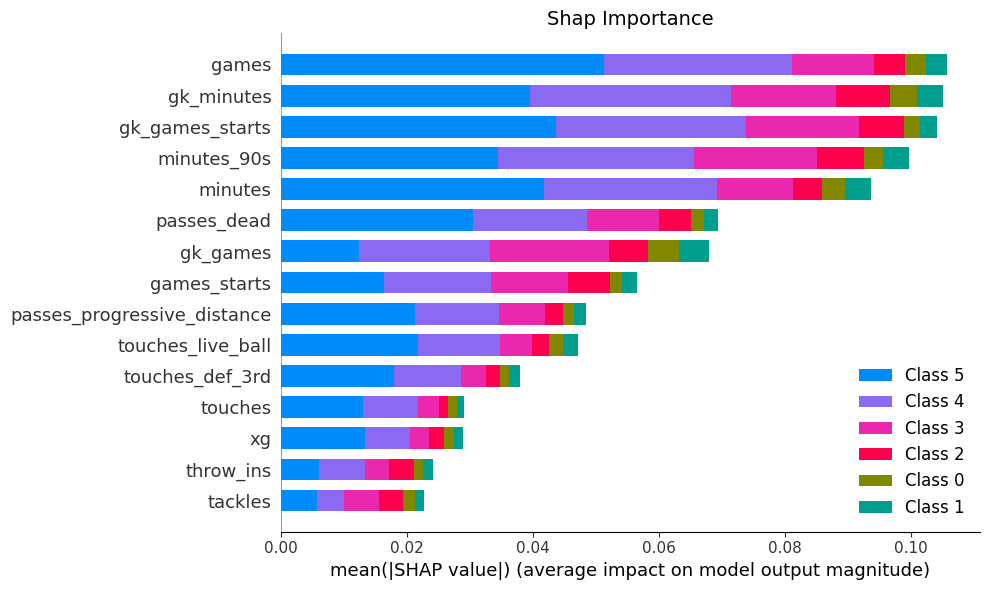

In [63]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=features.columns.to_list(), 
                    show=False, max_display=15)

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.title("Shap Importance", fontsize=14, loc="center")   
plt.tight_layout()
plt.show()